# Modelling and Evaluation Notebook

## Objectives

- To address business requirement 2:
  - The client wants to know if a given image of a cherry leaf is healthy or shows powdery mildew.

## Inputs

This notebook will use the following inputs:

- inputs/cherry-leaves/cherry-leaves/test
- inputs/cherry-leaves/cherry-leaves/train
- inputs/cherry-leaves/cherry-leaves/validation
- outputs/v1/image_shape.pkl

## Outputs

This notebook will generate the following outputs:

- Plot showing the number of images in the train, validation, and test sets.
- Image augmentation.
- Class indices to change prediction inference in labels.
- Machine learning model creation and training.
- Saved model.
- Learning curve plot for model performance.
- Model evaluation on pickle file.
- Prediction on the random image file.

### Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import joblib
from matplotlib.image import imread
from PIL import Image

### Set Working Directory

First, Identify the current working directory...

In [2]:
current_dir = os.getcwd()  
print(f"📂 Current Directory: {current_dir}")

📂 Current Directory: /workspaces/milestone-project-mildew-detection-in-cherry-leaves/jupyter_notebooks


...then set the new working directory...

In [3]:
target_dir = "/workspaces/milestone-project-mildew-detection-in-cherry-leaves"  # Replace with your correct path
os.chdir(target_dir)
print(f"✅ Working Directory Set to:📂 {os.getcwd()}")

✅ Working Directory Set to:📂 /workspaces/milestone-project-mildew-detection-in-cherry-leaves


...and finally chack that the new working directory (current directory) matches the target_directory.

In [4]:
current_dir = os.getcwd()
print(f"📂 Current Directory: {current_dir}")

📂 Current Directory: /workspaces/milestone-project-mildew-detection-in-cherry-leaves


### Set input directories

We will now set the file paths for retrieving the image data from the train, test and validation folders.

In [5]:
image_data = "inputs/cherry-leaves/cherry-leaves"
train_path = os.path.join(image_data, "train")
val_path = os.path.join(image_data, "validation")
test_path = os.path.join(image_data, "test")

print(f"📂 Train Path: {train_path}")
print(f"📂 Validation Path: {val_path}")
print(f"📂 Test Path: {test_path}")

📂 Train Path: inputs/cherry-leaves/cherry-leaves/train
📂 Validation Path: inputs/cherry-leaves/cherry-leaves/validation
📂 Test Path: inputs/cherry-leaves/cherry-leaves/test


### Confrim the paths are valid

Run a fucntion to select and display one random image from each train, test and validation folder.This will confirm that the file paths are correct.

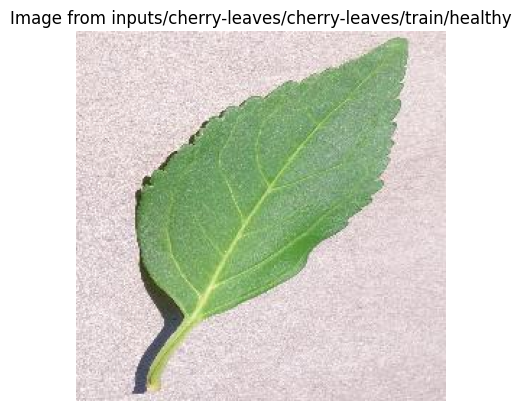

✅ Random train image: inputs/cherry-leaves/cherry-leaves/train/healthy/a0b4d7a4-947b-4ca7-9984-88da24f41390___JR_HL 9468.JPG


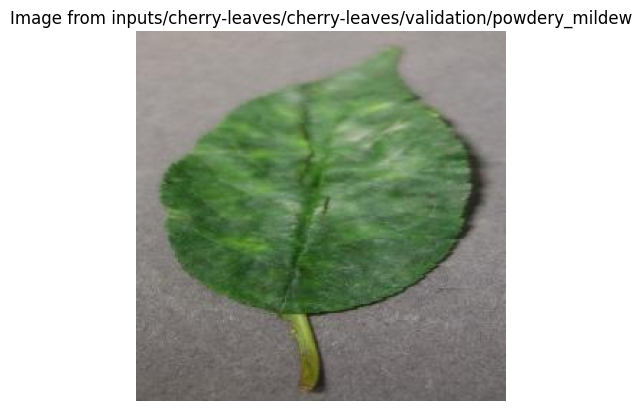

✅ Random validation image: inputs/cherry-leaves/cherry-leaves/validation/powdery_mildew/3e6d1db1-c9f7-451d-a79b-0a11260e5a92___FREC_Pwd.M 0493.JPG


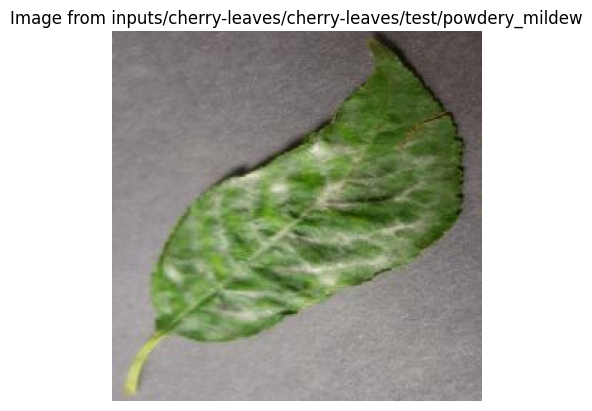

✅ Random test image: inputs/cherry-leaves/cherry-leaves/test/powdery_mildew/c98fe18a-cac1-4956-8fa5-a5bac2c5c268___FREC_Pwd.M 4793_flipLR.JPG


In [6]:

# Define paths correctly
image_data = "inputs/cherry-leaves/cherry-leaves"
train_path = os.path.join(image_data, "train")
val_path = os.path.join(image_data, "validation")
test_path = os.path.join(image_data, "test")

# Function to find and display a random image from subfolders
def show_random_image(parent_folder):
    """
    Selects and displays a random image from a subfolder inside the given parent directory.

    Args:
        parent_folder (str): The path to the main dataset folder (e.g., train, validation, test).

    Returns:
        str or None: The full path to the randomly selected image, or None if no images are found.
    """

    # Ensure the parent folder exists
    if not os.path.exists(parent_folder):
        print(f"❌ Path does not exist: {parent_folder}")
        return None

    # Scan subdirectories ("healthy", "powdery_mildew")
    subfolders = [os.path.join(parent_folder, subdir) for subdir in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, subdir))]

    if not subfolders:
        print(f"⚠️ No subfolders found in: {parent_folder}")
        return None

    # Pick a random subfolder
    chosen_folder = random.choice(subfolders)

    # Find image files inside that subfolder
    images = [f for f in os.listdir(chosen_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.webp'))]

    if not images:
        print(f"⚠️ No images found in: {chosen_folder}")
        return None

    # Select a random image and display it
    image_path = os.path.join(chosen_folder, random.choice(images))
    image = Image.open(image_path)

    plt.imshow(image)
    plt.title(f"Image from {chosen_folder}")
    plt.axis("off")  # Hide axes for a cleaner look
    plt.show()

    return image_path  # Return path for confirmation

# Fetch and display random images from each dataset section
train_image = show_random_image(train_path)
print(f"✅ Random train image: {train_image}")
val_image = show_random_image(val_path)
print(f"✅ Random validation image: {val_image}")
test_image = show_random_image(test_path)
print(f"✅ Random test image: {test_image}")


### Set output directories

Create 📂 'output' directory if it doesn't already exist.

In [7]:
# Define the version of the output directory
version = 'v1'
current_dir = os.getcwd()  # Get the current working directory

# Construct the full path for the versioned output folder
file_path = os.path.join(current_dir, 'outputs', version)

# Check if the directory for this version already exists
if os.path.exists(file_path):
    print(f'⚠️ Old version "{version}" already exists and the file path to it has just been set.') 
    print(f'Create a new version if required. If not, you are good to go!👍')
else:
    try:
        # Create the directory if it doesn't exist, `exist_ok=True` prevents errors if it already exists
        os.makedirs(file_path, exist_ok=True)
        print(f'✅ Created new directory:📂 {file_path}')
    except OSError as e:
        # Print an error message if directory creation fails
        print(f'❌ Error creating directory: {e}')

⚠️ Old version "v1" already exists and the file path to it has just been set.
Create a new version if required. If not, you are good to go!👍


### Set labels 

Labels should be 'healthy' and 'powdery_mildew'.

In [8]:
# Set the labels
labels = os.listdir(train_path)
print('🏷️ The labels for the images are', labels)

🏷️ The labels for the images are ['healthy', 'powdery_mildew']


## Let's Count the Images

In the Data Collection notebook, we downloaded two directories of images:

- 📂healthy
- 📂powdery_mildew
  
We then split the images in each directory into three further folders:

- 📂test
- 📂train
- 📂validation

In this notebook, we now need to count how many images are in each of these six folders. We will create a loop to do the count then display the results in a plot.

📂 train - 🏷️ healthy: 1472 images
📂 train - 🏷️ powdery_mildew: 1472 images
📂 validation - 🏷️ healthy: 210 images
📂 validation - 🏷️ powdery_mildew: 210 images
📂 test - 🏷️ healthy: 422 images
📂 test - 🏷️ powdery_mildew: 422 images


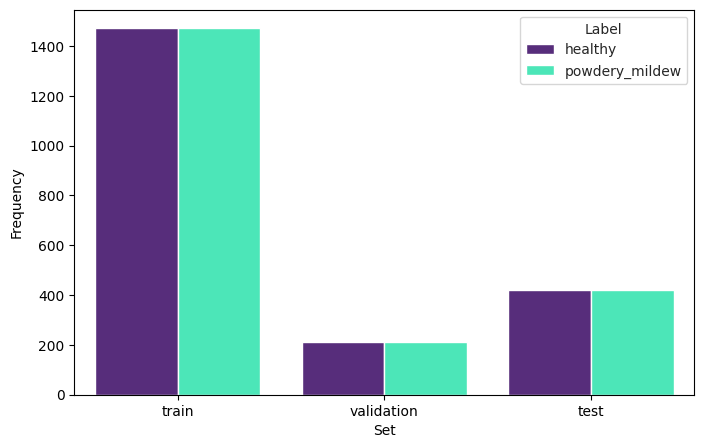

In [9]:

# Create an empty dictionary
data = {
    'Set': [],
    'Label': [],
    'Frequency': []
}

# Define dataset partitions
folders = ['train', 'validation', 'test']

# Collect data efficiently
for folder in folders:
    for label in labels:
        label_path = os.path.join(image_data, folder, label)
        if os.path.exists(label_path):  # Check if path exists before listing
            num_images = len(os.listdir(label_path))
        else:
            num_images = 0  # Handle missing folders gracefully
        
        data['Set'].append(folder)
        data['Label'].append(label)
        data['Frequency'].append(num_images)

        print(f"📂 {folder} - 🏷️ {label}: {num_images} images")

# Convert to DataFrame
df_freq = pd.DataFrame(data)

# Create the figure object
fig, ax = plt.subplots(figsize=(8, 5))

# Define custom colors
custom_colors = ["#582088", "#33FFC29F"]  # Adjust HEX colours as required 🎨

# Plot with updated colors
sns.set_style("whitegrid")
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label', palette=custom_colors, ax=ax)

# Show plot (figure remains stored in 'fig' for later saving)
plt.show()



### Save the plot

If you're happy with the plot layout and colour scheme, save it in the 'outputs/v1' folder.

In [10]:
# Save the stored figure explicitly
fig.savefig(os.path.join(file_path, 'labels_distribution.png'), bbox_inches='tight', dpi=150)
print("✅ Plot saved successfully!")


✅ Plot saved successfully!


As we can see from the count, we have equal numbers of 'healthy' and 'powdery_mildew' images across the train, test and validation folders. Had the numbers been unequal, we would have given consideration to data balancing (oversampling or undersampling). As it stands, we don't need to do any data balancing so we can now move on to data augmentation.

## Let's augment our image data

Currently all our images look roughly the same in terms of size, aspect and zoom, for exmaple. To build a more robust machine learning model we need to 'rough up' our dataset a little. Real world images won't always look like the unifom set of images that we downloaded so we need the model to learn using an 'augmented' dataset. An augmented dataset introduces variations such as random rotations, cropping, zoom adjustments, brightness shifts, and flipping to simulate the unpredictability of real-world images.

This process, known as data augmentation, helps the model generalize better by learning from a diverse set of image transformations. By applying augmentation techniques, we can effectively enhance the robustness of our machine learning model, making it more resilient to variations in new and unseen data.

So, let's get to it! 👍


### Import ImageDataGenerator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-05-19 11:53:05.353216: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-19 11:53:05.836918: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Let's now define the adjustments that we want to make. Credit Code Institute WalkthroughProject01 for initail parameter selection.

In [12]:
augmented_image_data = ImageDataGenerator(
    rotation_range=25,  # More rotation to introduce stronger perspective shifts
    width_shift_range=0.15,  # Wider horizontal translations
    height_shift_range=0.15,  # Wider vertical translations
    shear_range=0.2,  # Stronger shearing for distortion effects
    zoom_range=0.2,  # More zoom variations to simulate different focal depths
    horizontal_flip=True,  # Mirroring images to improve orientation generalization
    vertical_flip=True,  # Vertical flips if objects don't depend on upright orientation
    brightness_range=(0.7, 1.3),  # Adjust brightness for lighting variations 🌞🔆
    channel_shift_range=20,  # Shift pixel intensities for color variance
    fill_mode='nearest',  # Fill missing pixels using nearest neighbor interpolation
    rescale=1./255  # Normalization for pixel values
)

### Augment the training image dataset

Now we can make use of the above variable to augment the images in the train set.

In [13]:
import pickle

# Load the image_shape variable from the .pkl file
with open('outputs/v1/image_shape.pkl', 'rb') as f:  
    image_shape = pickle.load(f)  # Load stored shape

# Debug check – Print loaded image shape to validate dimensions
print(f"Loaded image shape: {image_shape}")

# Ensure it's in the correct format for target_size (extract height & width)
target_size = tuple(image_shape[:2])  

# Define batch size for training
batch_size = 8  # Balances memory efficiency & training speed

# Load training dataset with augmentation
train_set = augmented_image_data.flow_from_directory(
    train_path,
    target_size=image_shape[:2],  # Dynamically set from loaded shape
    color_mode='rgb',  # Ensures images are loaded in color
    batch_size=batch_size,  
    class_mode='binary',
    shuffle=True  # Prevents learning biases from order dependencies
)

# Check class indices mapping
train_set.class_indices

Loaded image shape: (256, 256, 3)
Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment test image data

Now, when it comes to augmenting test image data, we are only going to worry about resizing the images. This is because the test images should be as close as possible to the 'real world' images that will be uploaded by the users.

As you can see from the variable below, we are only going to make use of the ``rescale`` parameter in the ``ImageDataGenerator`` class.

In [14]:
# Initialize the ImageDataGenerator for the test set
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path,  # Path to the test dataset directory

    target_size=image_shape[:2],  # Resizes images to match model input dimensions (height, width)

    color_mode='rgb',  # Loads images in RGB format

    batch_size=batch_size,  # Number of images processed per batch during evaluation

    class_mode='binary',

    shuffle=False  # Keeps data order unchanged to ensure consistent evaluation results
)

# Print class indices mapping
test_set.class_indices  # Displays dictionary mapping class names to numerical labels

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment validation image data

The same logic applies to the validation image data. This should also match 'real world' data as closely as possible.

In [15]:
# Initialize the ImageDataGenerator for the validation set
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_path,  # Path to the validation dataset directory

    target_size=image_shape[:2],  # Resizes images to match model input dimensions (height, width)

    color_mode='rgb',  # Loads images in RGB format

    batch_size=batch_size,  # Number of images processed per batch during validation

    class_mode='binary',

    shuffle=False  # Keeps data order unchanged to ensure consistent evaluation during validation
)

# Print class indices mapping
validation_set.class_indices  # Displays dictionary mapping class names to numerical labels

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Let's take a look at some examples the augmented images

We'll now create a function to display three augmented images from each dataset.

In [16]:

def show_random_augmented_samples(train_set, validation_set, test_set):
    """Displays three randomly selected augmented images from each dataset (train, validation, test) in a 3x3 plot."""
    
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    dataset_names = ["Train", "Validation", "Test"]
    datasets = [train_set, validation_set, test_set]

    for col, (dataset_name, dataset) in enumerate(zip(dataset_names, datasets)):
        # Generate random indices for batch selection
        random_indices = np.random.randint(0, dataset.batch_size, 3)  

        for row, idx in enumerate(random_indices):  # Select images at random positions in batch
            img, label = next(dataset)  # Fetch a batch
            img = img[idx]  # Extract random image from batch
            
            axes[row, col].imshow(img)
            axes[row, col].axis("off")  # Hide axis for cleaner view
            if row == 0:  
                axes[row, col].set_title(dataset_name, fontsize=14, fontweight="bold")

    plt.tight_layout()
    plt.show()

Now let's call the function.

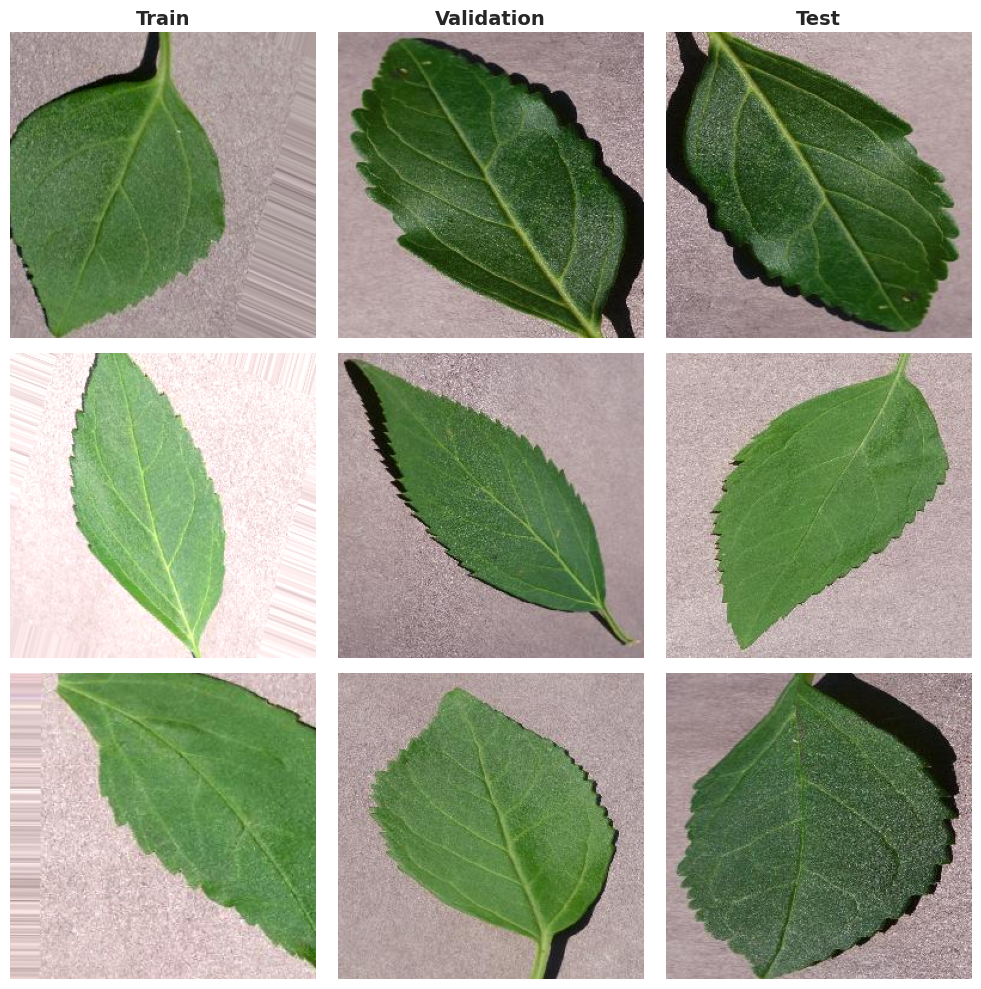

In [17]:
show_random_augmented_samples(train_set, validation_set, test_set)

### Save class indices for later use

Let's now save the class indicies for the train set into a .pkl file for later use.

In [18]:
# Save class indices to a file
joblib.dump(value=train_set.class_indices, filename=f"{file_path}/class_indices.pkl")
print(f"📄 File saved: '{file_path}/class_indices.pkl'")

📄 File saved: '/workspaces/milestone-project-mildew-detection-in-cherry-leaves/outputs/v1/class_indices.pkl'


## The Model

Now we need to create a model that trains...

In [19]:
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load image shape from .pkl file
with open('outputs/v1/image_shape.pkl', 'rb') as f:  
    image_shape = pickle.load(f)

# Debug check – Print loaded image shape to validate dimensions
print(f"Loaded image shape: {image_shape}")

# Extract (height, width) for dataset loading
target_size = tuple(image_shape[:2]) 

# Define batch size
batch_size = 8 

Loaded image shape: (256, 256, 3)


In [21]:
# Define ImageDataGenerator with augmentation
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')

# Load training dataset

train_set = datagen.flow_from_directory(train_path,
                                        target_size=target_size,
                                        batch_size=batch_size,
                                        class_mode='binary',
                                        shuffle=True)

# Debug check – Print class mappings
print(train_set.class_indices)

Found 2944 images belonging to 2 classes.
{'healthy': 0, 'powdery_mildew': 1}


In [22]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers

def create_cnn_model(input_shape=image_shape):  # Use the loaded shape
    model = Sequential()

    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create model using loaded image shape
cnn_model = create_cnn_model()
cnn_model.summary()

/home/cistudent/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,105 (56.61 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [24]:
print(f"Total training images: {train_set.samples}")
print(f"Batch size: {batch_size}")
print(f"Calculated steps_per_epoch: {train_set.samples // batch_size}")

Total training images: 2944
Batch size: 8
Calculated steps_per_epoch: 368


In [25]:
# fit model for training


# Create the model
cnn_model = create_cnn_model()

# Train the model
steps_per_epoch = min(train_set.samples // batch_size, 50)  # Cap at 100 steps

cnn_model.fit(train_set,
              epochs=10,
              steps_per_epoch=steps_per_epoch,  
              validation_data=validation_set,
              callbacks=[early_stop],
              verbose=1)

/home/cistudent/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
45/50 ━━━━━━━━━━━━━━━━━━━━ 2s 554ms/step - accuracy: 0.5384 - loss: 0.8665

: 